<a href="https://colab.research.google.com/github/Sebasttiann/Python-Inmuebles_Colombia/blob/main/Inmuebles_COL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3392,Casa,Casa en venta en Chico Reservado,4,4,285,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 870.000.000
918,Apartamento,Apartamento en venta en Engativa,3,2,75,Engativa,Engativá,$ 413.500.000
1031,Apartamento,Apartamento en venta en Santa Barbara,3,5,342,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 1.190.000.000
8665,Apartamento,Apartamento en venta en Santa Barbara,2,2,75,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 389.708.000
6621,Apartamento,Apartamento en venta en Usaquén,3,2,56,Usaquén,Usaquén,$ 220.800.000


Para sacar el area promedio agrupamos con .groupby nuestro data diciendole que agrupo por Barrios y luego en la columna Area obtenemos el promedio con .mean - Plus: el reset index es para reiniciar el indice y que no tome la ciudad como indices para cada dato si no que lo tome como la columna que es.

In [ ]:
area_promedio_barrio = inmuebles.groupby("Barrio")["Area"].mean().reset_index()
area_promedio_barrio.head()

,Barrio,Area
0,Alameda,97.000000
1,Alhambra,190.411765
2,Andes Norte,124.857143
3,Antonio Nariño,163.062500
4,Barrancas,70.200000


Teniendo ya el promedio de todas las areas por barrio las ordenamos, como queremos el top 10 las ordenaremos descendientemente.

In [ ]:
top_10_areas = area_promedio_barrio.sort_values('Area', ascending=False)
top_10_areas.head(10)


,Barrio,Area
92,Modelia,4316.750000
83,Libertador,642.000000
11,Bosa Piamonte,400.000000
73,La Soledad,378.625000
114,Restrepo,336.500000
127,Santa Librada,328.000000
80,Las Ferias,320.000000
124,Santa Ana,309.375000
141,Veraguas,302.666667
7,Bellavista Occidental,286.200000


Graficamos igual que en la clase


<Axes: >

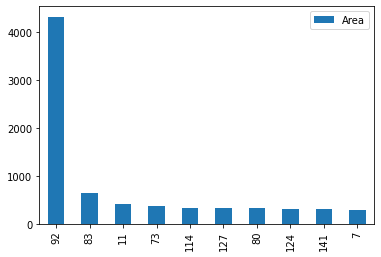

In [ ]:
top_10_areas.head(10).plot.bar()

In [ ]:
conteo_inmuebles = inmuebles.count()[0]
conteo_inmuebles

9520

El [0] al final de inmuebles.count()[0] se utiliza para obtener el conteo de la primera columna del DataFrame. Si no incluyéramos [0], el resultado sería un objeto Series que contiene el conteo de valores no nulos en cada columna del DataFrame, y no el conteo total de inmuebles.

La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.

Para sacar la mediana Pandas nos facilita la funcion .median() . Pero para poder usar los datos encontrados en la columna Valor tenemos que convertirlos en datos de tipo Float. para poder hacer esto tenemos que limpiar primero el string con replace para eliminar todos los simbolos y luego poder convertirlo con la funcion .astype()

In [ ]:
inmuebles['Valor'] = inmuebles['Valor'].str.replace("$","").str.replace(".", "").str.replace(",", ".").astype(float)


In [ ]:
inmuebles.info()  ## aqui podemos ver como ahora la columna Valor es de tipo Float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 595.1+ KB


Utilizamos la funcion .median()

In [ ]:
mediana_precios = inmuebles['Valor'].median()
mediana_precios

409182500.0

Ahora como nuestra columna valor es de tipo Float podemos hacer otras operaciones con ella como Sacar los valores minimos y maximos de los inmuebles

In [ ]:
precio_minimo = inmuebles['Valor'].min()
precio_minimo

#Con la funcion Min() obtenemos el valor Minimo


60000000.0

In [ ]:
precio_maximo = inmuebles['Valor'].max()
precio_maximo

# Y con la funcion Max() el valor Maximo

16000000000.0